In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
cur_qc = pd.read_csv("combined-QC.csv")

In [87]:
cur_qc["total_words"] = cur_qc["num_words_S1"] + cur_qc["num_words_S2"] + cur_qc["num_words_S3"]
cur_qc["inaudible_rate"] = cur_qc["num_inaudible"]/cur_qc["total_words"]
cur_qc["redaction_rate"] = cur_qc["num_redacted"]/cur_qc["total_words"]
cur_qc["total_turns"] = cur_qc["num_turns_S1"] + cur_qc["num_turns_S2"] + cur_qc["num_turns_S3"]
cur_qc["max_speaker_words"] = [max(x,y,z) for x,y,z in zip(cur_qc["num_words_S1"].tolist(),cur_qc["num_words_S2"].tolist(),cur_qc["num_words_S3"].tolist())]
cur_qc["max_speaker_turns"] = [max(x,y,z) for x,y,z in zip(cur_qc["num_turns_S1"].tolist(),cur_qc["num_turns_S2"].tolist(),cur_qc["num_turns_S3"].tolist())]
cur_qc["speech_frac"] = cur_qc["max_speaker_words"]/cur_qc["total_words"]
cur_qc["words_per_turn"] = cur_qc["total_words"]/cur_qc["total_turns"]

In [97]:
opens = cur_qc[cur_qc["interview_type"]=="open"]
psychs = cur_qc[cur_qc["interview_type"]=="psychs"]

### Open Interviews Length vs Inaudibles

Text(0.5, 1.0, 'open')

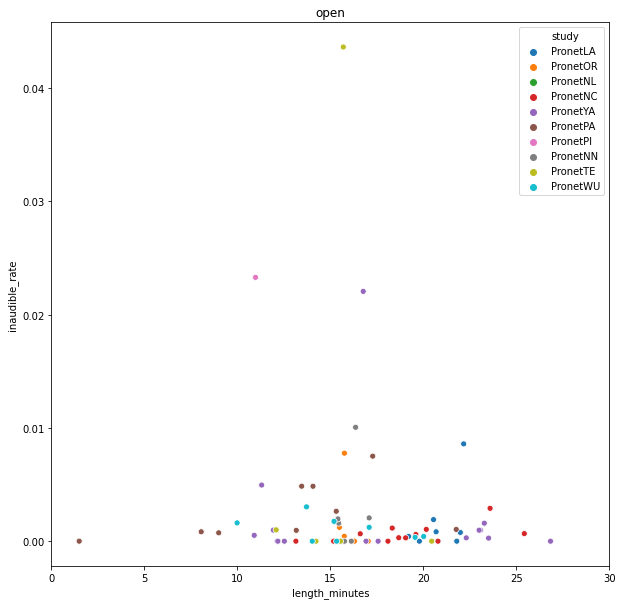

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="length_minutes",y="inaudible_rate",hue="study")
plt.xlim(0,30) # filter out the ridiculously long LA ones
plt.title("open")

### Open Interviews Length vs Faces

Text(0.5, 1.0, 'open')

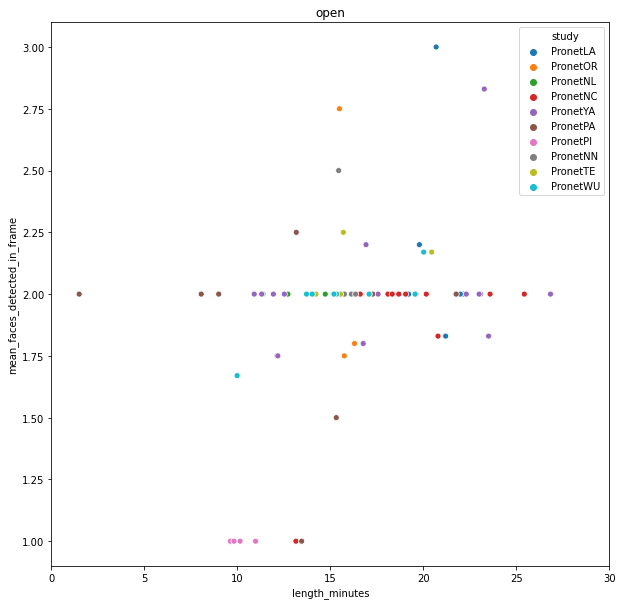

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="length_minutes",y="mean_faces_detected_in_frame",hue="study")
plt.xlim(0,30) # filter out the ridiculously long LA ones
plt.title("open")

### Repeat for Psychs

Text(0.5, 1.0, 'psychs')

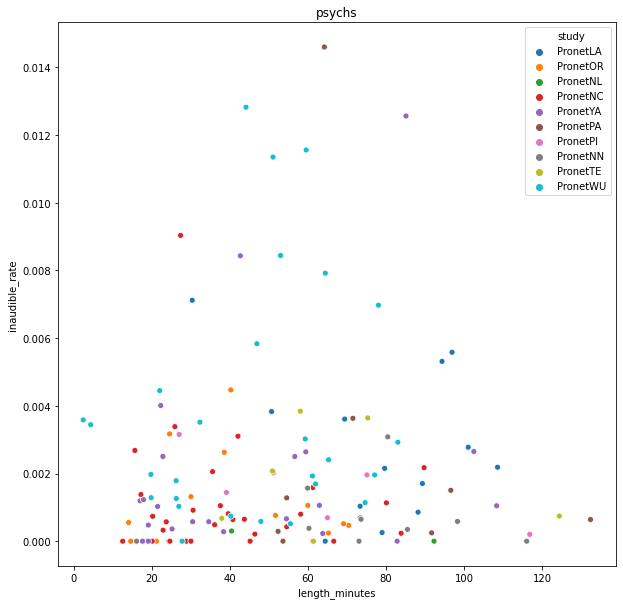

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=psychs,x="length_minutes",y="inaudible_rate",hue="study")
plt.title("psychs")

Text(0.5, 1.0, 'psychs')

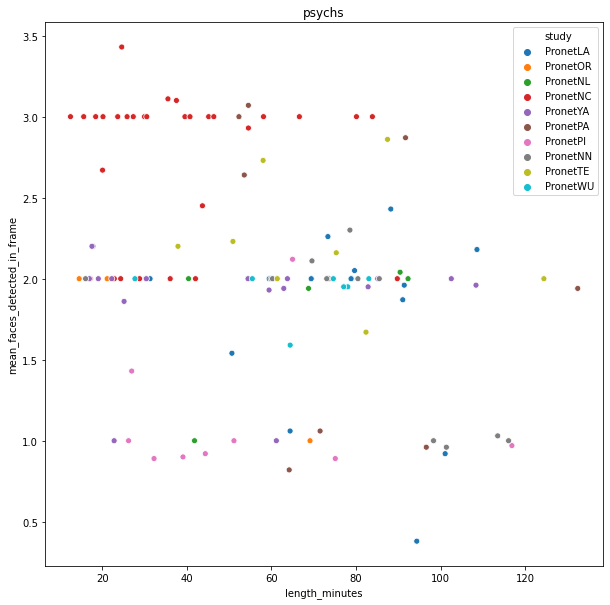

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=psychs,x="length_minutes",y="mean_faces_detected_in_frame",hue="study")
plt.title("psychs")

### Audio Feature Relationships of Interest (all interviews)

<AxesSubplot:xlabel='overall_db', ylabel='inaudible_rate'>

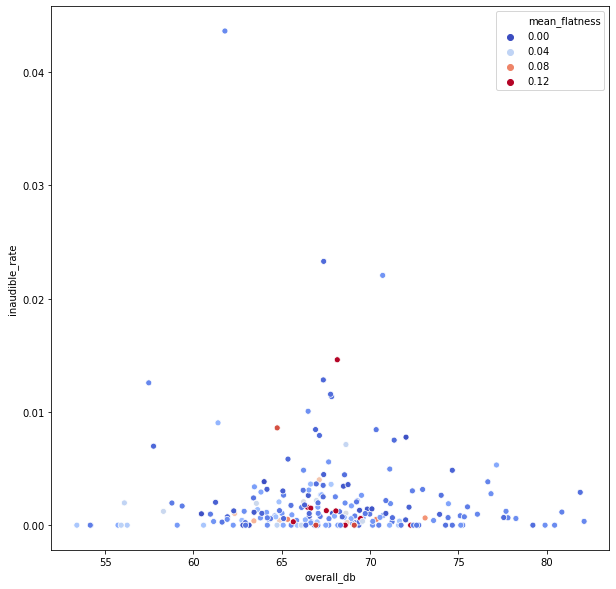

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="overall_db",y="inaudible_rate",hue="mean_flatness",palette='coolwarm',hue_norm=(0,0.1))

<AxesSubplot:xlabel='overall_db', ylabel='inaudible_rate'>

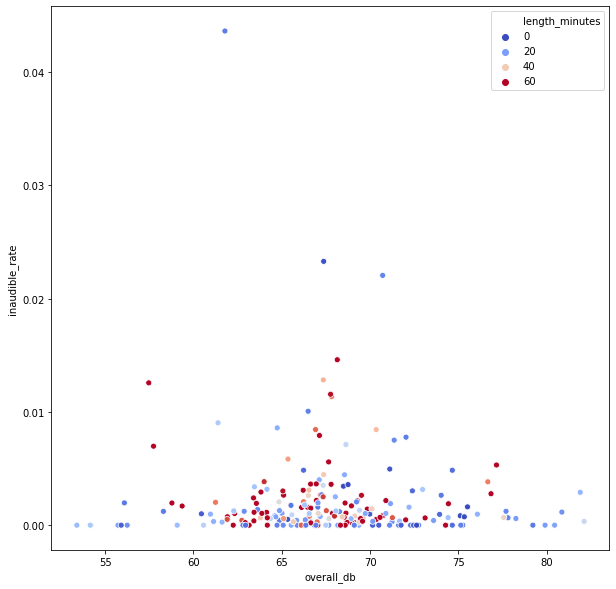

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="overall_db",y="inaudible_rate",hue="length_minutes",palette='coolwarm',hue_norm=(10,60))

<AxesSubplot:xlabel='mean_flatness', ylabel='inaudible_rate'>

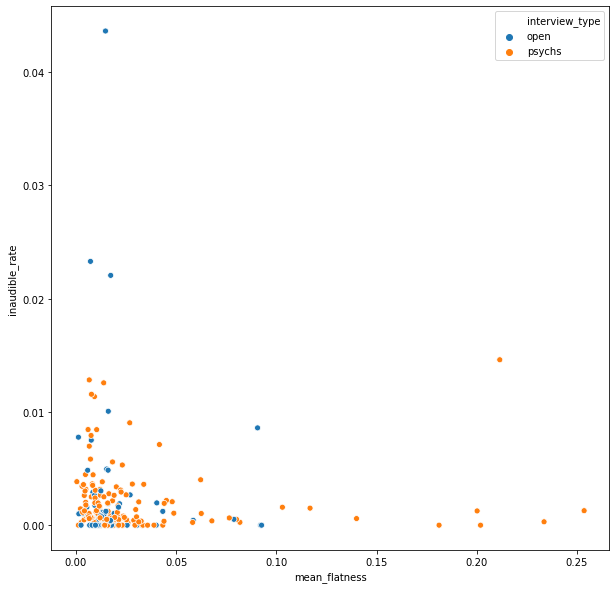

In [114]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="mean_flatness",y="inaudible_rate",hue="interview_type")

<AxesSubplot:xlabel='overall_db', ylabel='mean_flatness'>

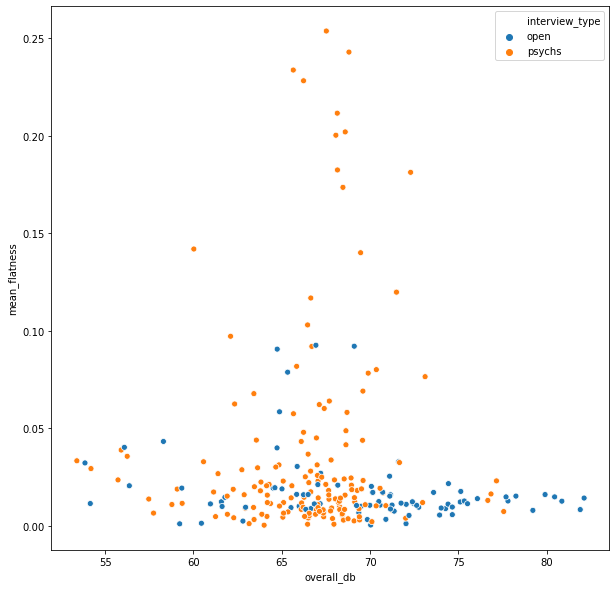

In [91]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="overall_db",y="mean_flatness",hue="interview_type")

<AxesSubplot:xlabel='mean_flatness', ylabel='length_minutes'>

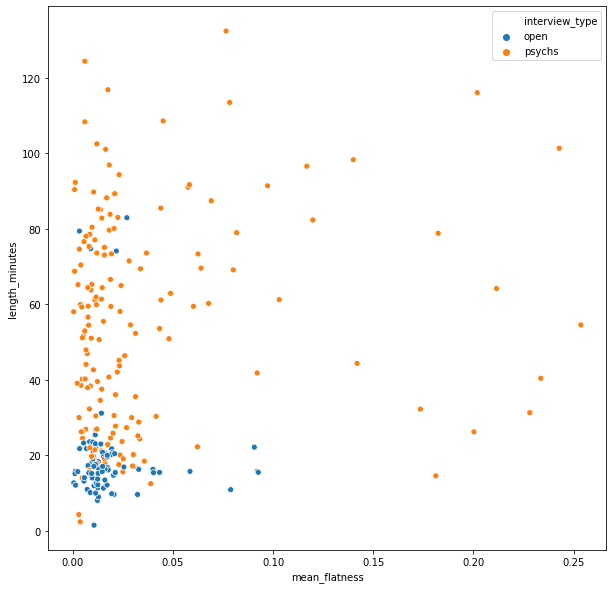

In [93]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="mean_flatness",y="length_minutes",hue="interview_type")

### Video Feature Relationships of Interest (all interviews)

<AxesSubplot:xlabel='mean_faces_detected_in_frame', ylabel='mean_face_area'>

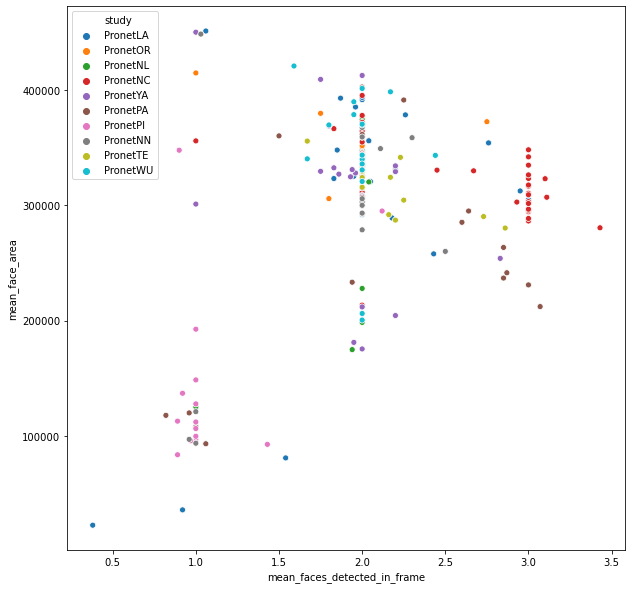

In [49]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="mean_faces_detected_in_frame",y="mean_face_area",hue="study")

<AxesSubplot:xlabel='mean_faces_detected_in_frame', ylabel='mean_face_area'>

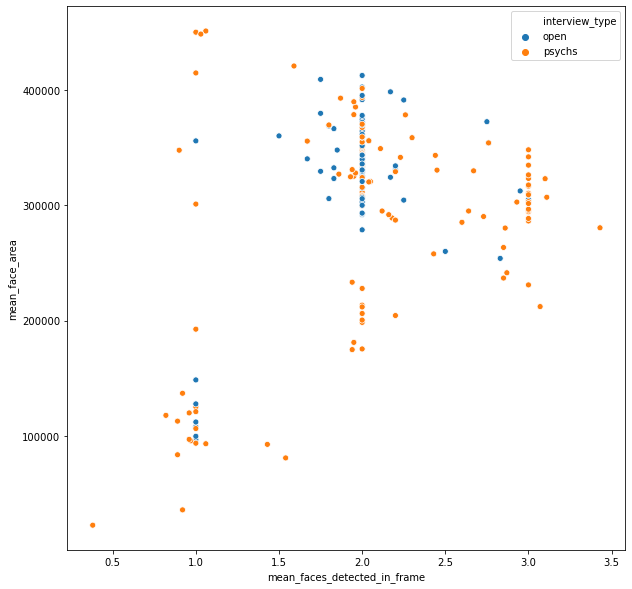

In [95]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="mean_faces_detected_in_frame",y="mean_face_area",hue="interview_type")

<AxesSubplot:xlabel='mean_faces_detected_in_frame', ylabel='num_subjects'>

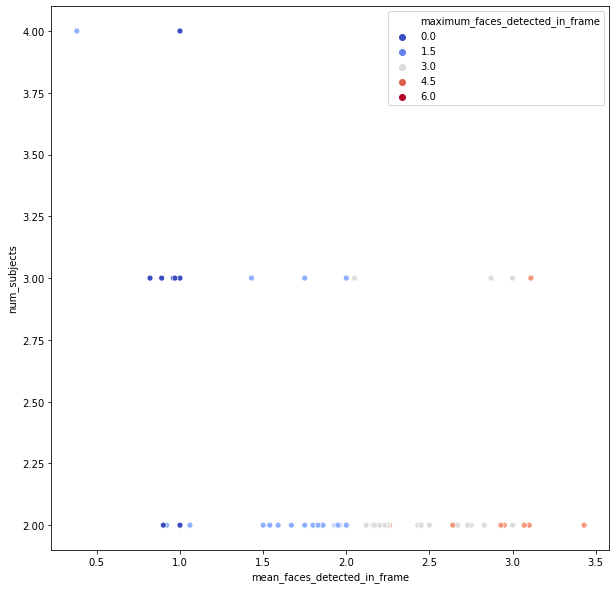

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="mean_faces_detected_in_frame",y="num_subjects",hue="maximum_faces_detected_in_frame",hue_norm=(1,5),palette='coolwarm')

<AxesSubplot:xlabel='mean_faces_detected_in_frame', ylabel='mean_face_area'>

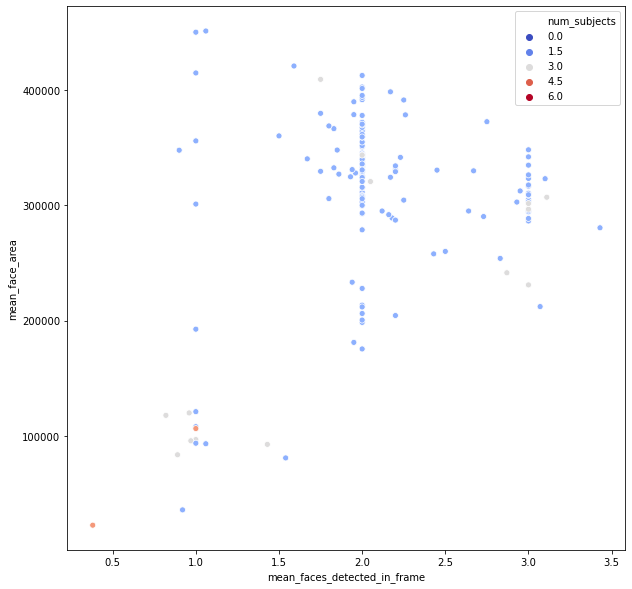

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="mean_faces_detected_in_frame",y="mean_face_area",hue="num_subjects",palette='coolwarm',hue_norm=(1,5))

In [94]:
cur_qc[["num_subjects","maximum_faces_detected_in_frame","interview_type","day"]].groupby(["num_subjects","maximum_faces_detected_in_frame","interview_type"]).count()

day
num_subjects maximum_faces_detected_in_frame interview_type     
2.0          1.0                             open              2
                                             psychs            7
             2.0                             open             55
                                             psychs           50
             3.0                             open             10
                                             psychs           26
             4.0                             open              2
                                             psychs            6
3.0          1.0                             open              1
                                             psychs            4
             2.0                             open              4
                                             psychs            1
             3.0                             psychs            6
             4.0                             psychs            1
4.0          1.0                             psychs            1
             2.0                             psychs            1

### Transcript Feature Relationships of Interest (all interviews)

<AxesSubplot:xlabel='final_timestamp_minutes', ylabel='length_minutes'>

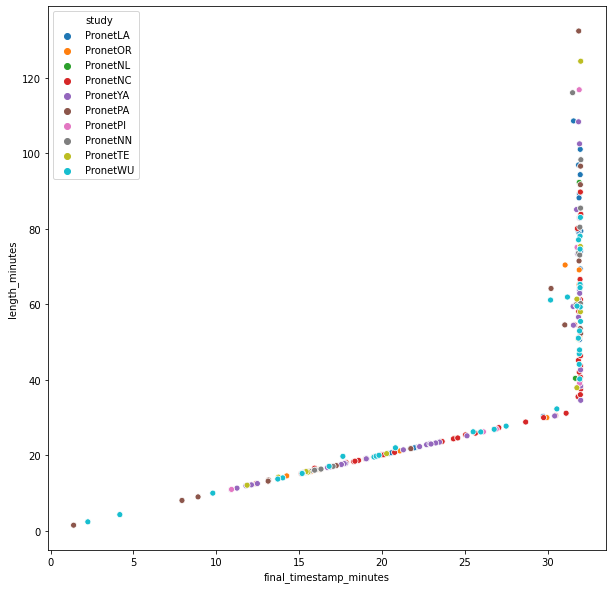

In [64]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="final_timestamp_minutes",y="length_minutes",hue="study")

<AxesSubplot:xlabel='total_words', ylabel='max_speaker_words'>

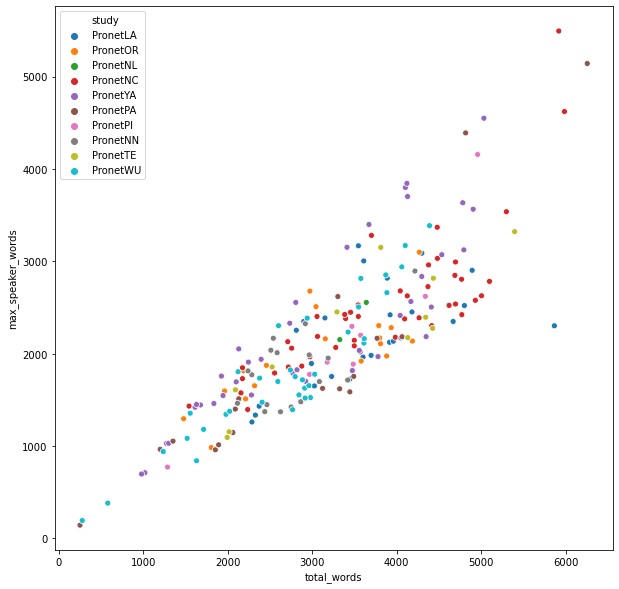

In [67]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="total_words",y="max_speaker_words",hue="study")
# note this is the maximum words from a particular speaker ID, but not specified whether that is interviewer or subj

<AxesSubplot:xlabel='total_turns', ylabel='total_words'>

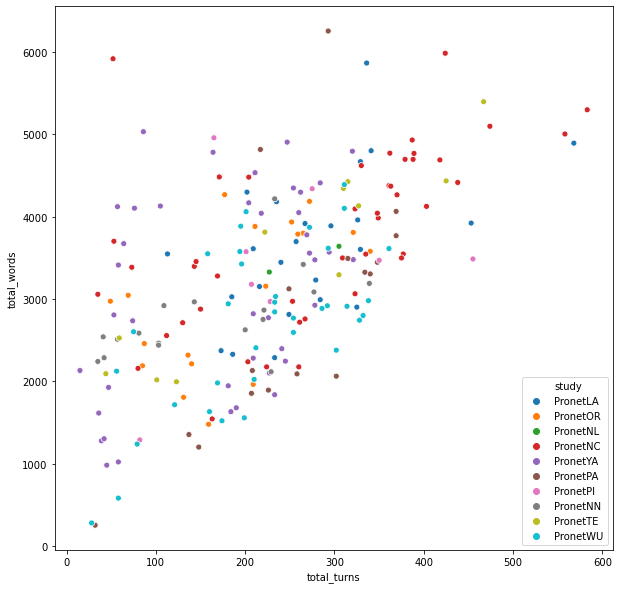

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="total_turns",y="total_words",hue="study")

<AxesSubplot:xlabel='speech_frac', ylabel='words_per_turn'>

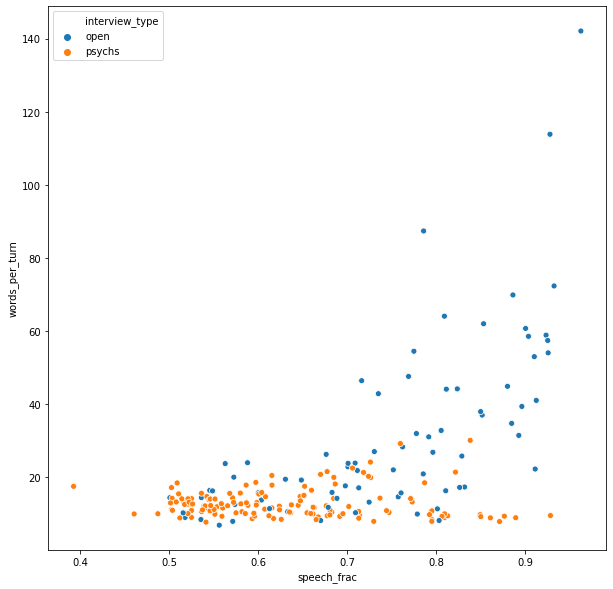

In [77]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="speech_frac",y="words_per_turn",hue="interview_type")

<AxesSubplot:xlabel='speech_frac', ylabel='total_words'>

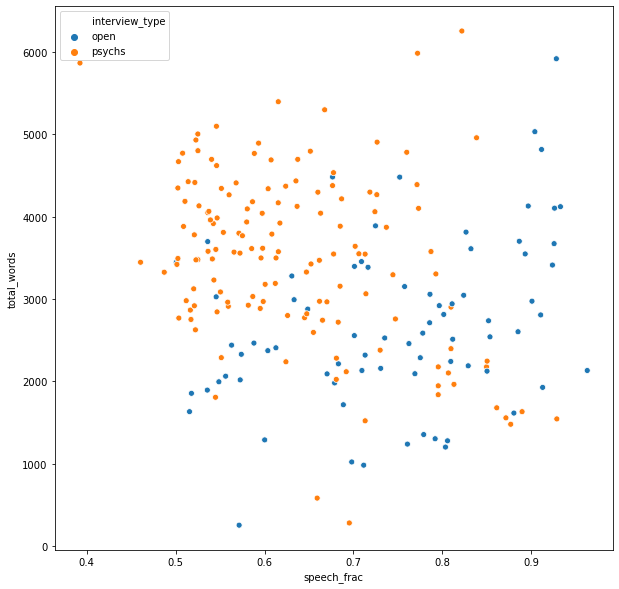

In [79]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="speech_frac",y="total_words",hue="interview_type")

<AxesSubplot:xlabel='words_per_turn', ylabel='total_words'>

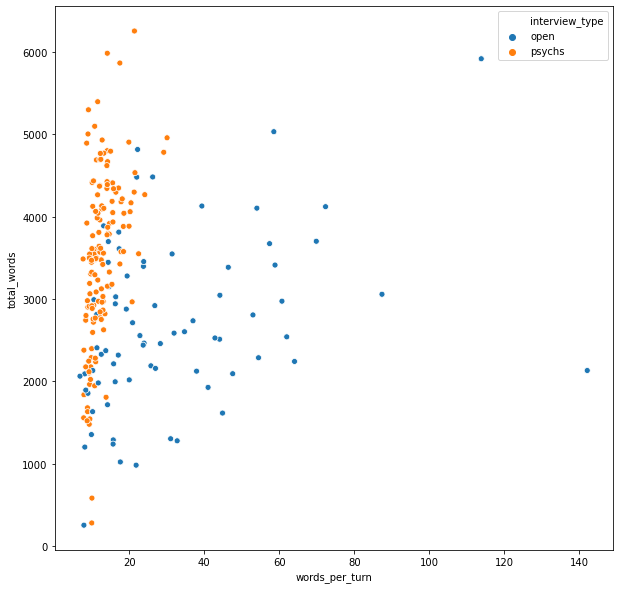

In [80]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="words_per_turn",y="total_words",hue="interview_type")

<AxesSubplot:xlabel='speech_frac', ylabel='redaction_rate'>

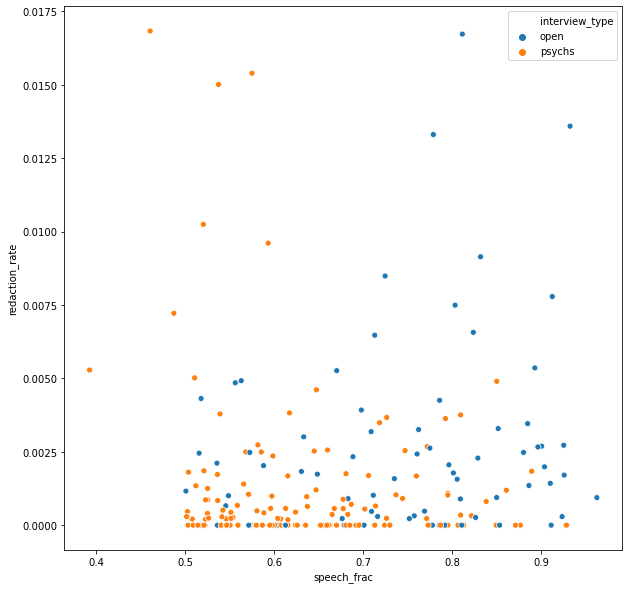

In [96]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="speech_frac",y="redaction_rate",hue="interview_type")

<AxesSubplot:xlabel='words_per_turn', ylabel='redaction_rate'>

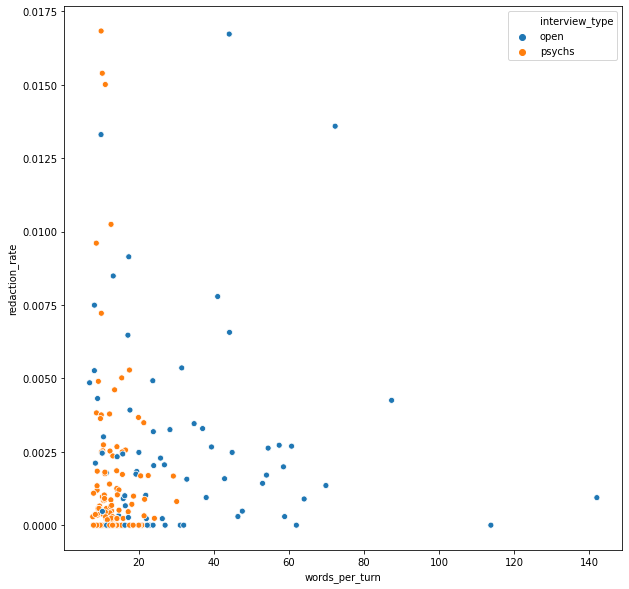

In [88]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="words_per_turn",y="redaction_rate",hue="interview_type")

<AxesSubplot:xlabel='inaudible_rate', ylabel='redaction_rate'>

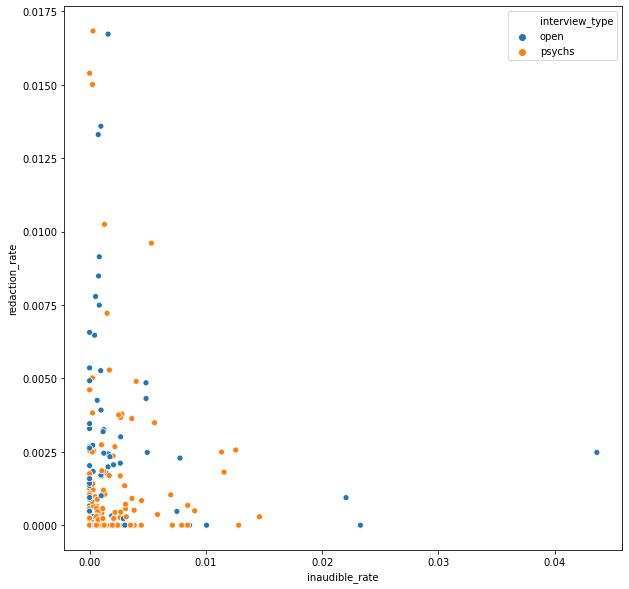

In [89]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="inaudible_rate",y="redaction_rate",hue="interview_type")

### Check Select Relationships in Open Only

Text(0.5, 1.0, 'open')

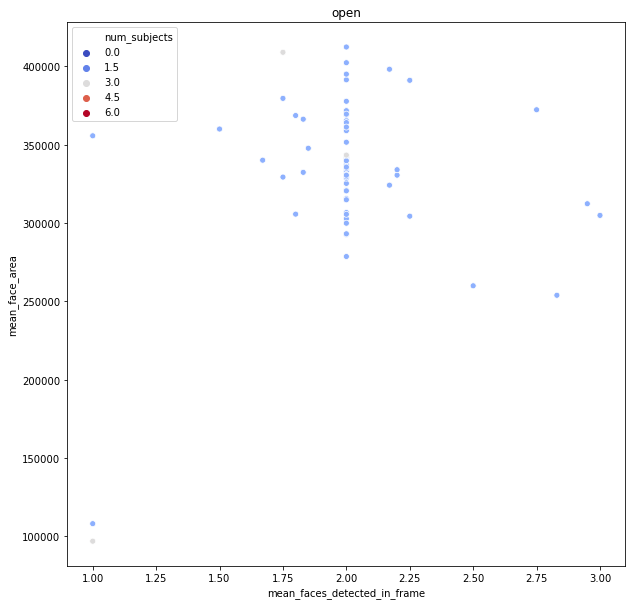

In [98]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="mean_faces_detected_in_frame",y="mean_face_area",hue="num_subjects",palette='coolwarm',hue_norm=(1,5))
plt.title("open") # not too many transcripts that also have video yet 

Text(0.5, 1.0, 'open')

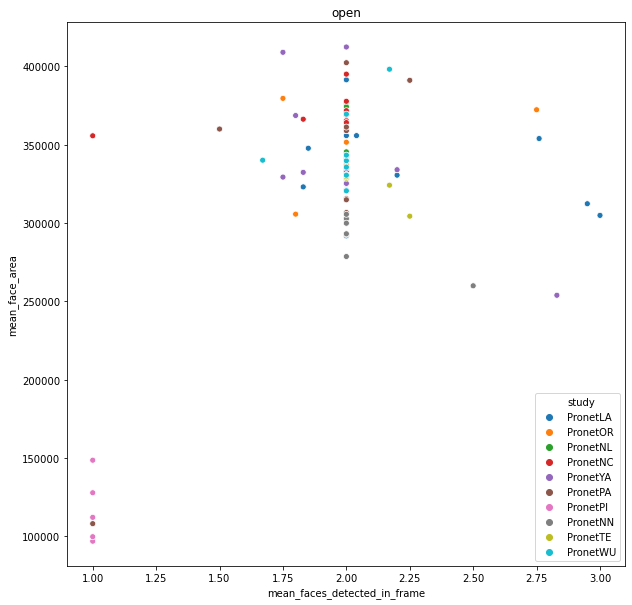

In [99]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="mean_faces_detected_in_frame",y="mean_face_area",hue="study")
plt.title("open")

Text(0.5, 1.0, 'open')

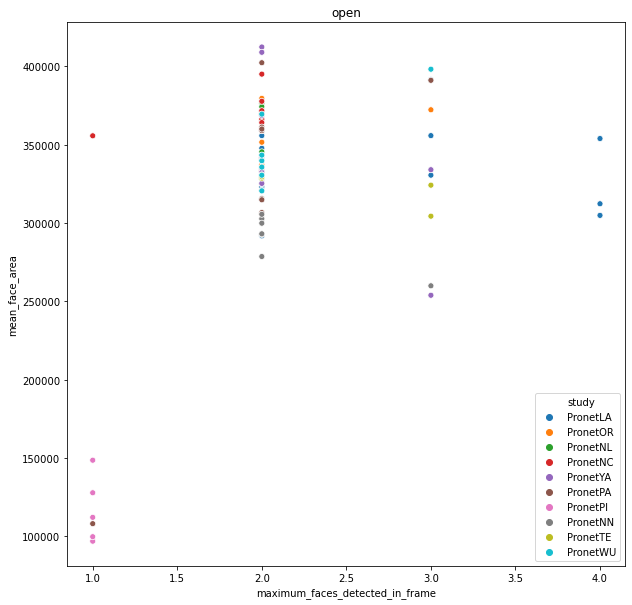

In [100]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="maximum_faces_detected_in_frame",y="mean_face_area",hue="study")
plt.title("open")

Text(0.5, 1.0, 'open')

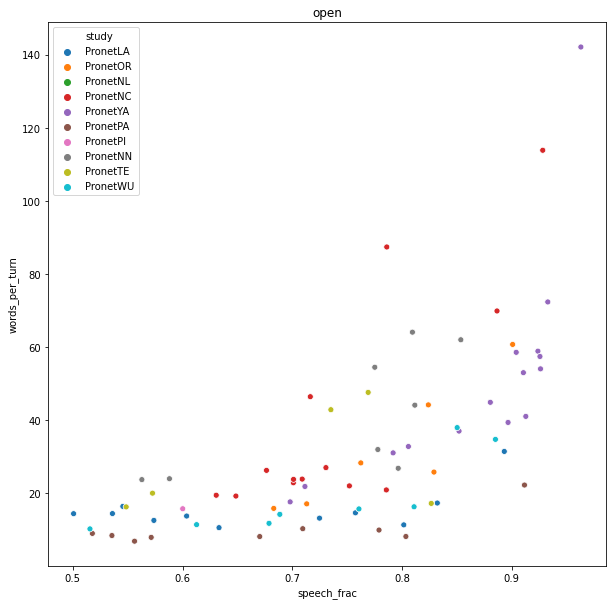

In [107]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="speech_frac",y="words_per_turn",hue="study")
plt.title("open")

Text(0.5, 1.0, 'open')

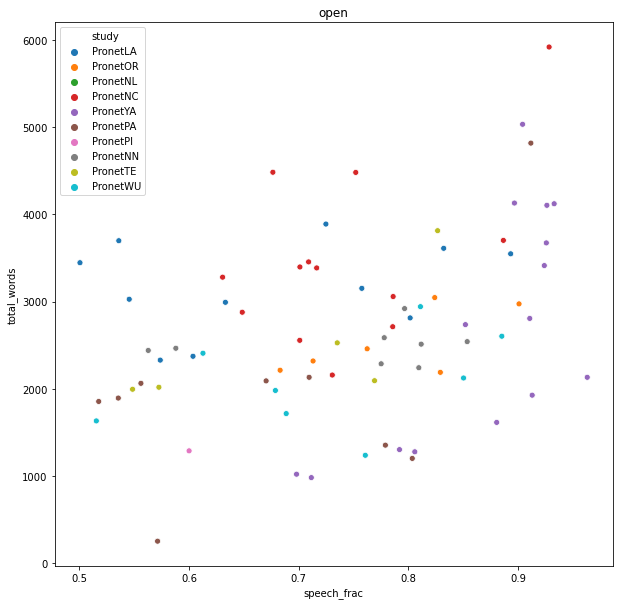

In [108]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="speech_frac",y="total_words",hue="study")
plt.title("open")

Text(0.5, 1.0, 'open')

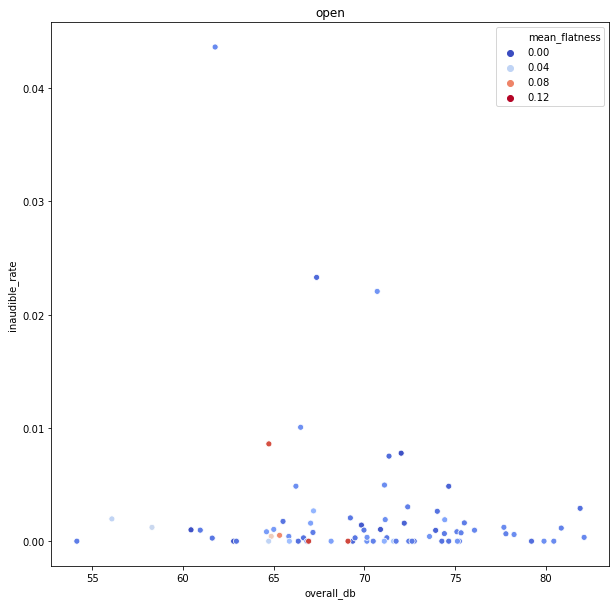

In [109]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="overall_db",y="inaudible_rate",hue="mean_flatness",palette='coolwarm',hue_norm=(0,0.1))
plt.title("open")

Text(0.5, 1.0, 'open')

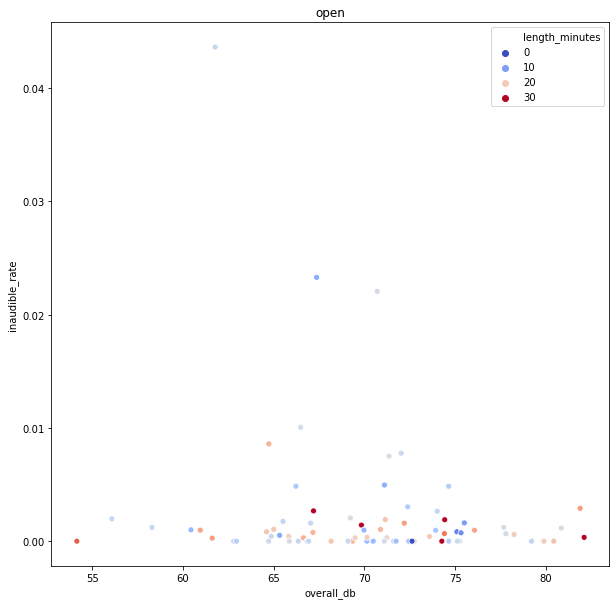

In [110]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="overall_db",y="inaudible_rate",hue="length_minutes",palette='coolwarm',hue_norm=(5,30))
plt.title("open")